## Phase II


### Data Collection and Cleaning

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## load data
school_data = pd.read_csv("Ny_School.csv")

#### Renaming Columns

In [2]:
new_colnames = []
for col in school_data.columns:
    new_colnames.append(col.lower())

In [3]:
for col in range(len(new_colnames)):
    new_colnames[col] = new_colnames[col].replace(" ", "_")
print (new_colnames)

sdata = school_data.copy()
sdata.columns = new_colnames

['dbn', 'school_name', 'year', 'total_enrollment', 'grade_pk_(half_day_&_full_day)', 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', '#_female', '%_female', '#_male', '%_male', '#_asian', '%_asian', '#_black', '%_black', '#_hispanic', '%_hispanic', '#_multiple_race_categories_not_represented', '%_multiple_race_categories_not_represented', '#_white', '%_white', '#_students_with_disabilities', '%_students_with_disabilities', '#_english_language_learners', '%_english_language_learners', '#_poverty', '%_poverty', 'economic_need_index']


First we renamed all the columns in order to make them easier to work with by making all the letters lower-cased and replacing spaces with underscores. 

#### Dropping Columns

In [4]:
sdata.drop(sdata.loc[:,["total_enrollment", "#_female", "%_female", "#_male", "%_male", "#_black", "#_white", "#_asian", "#_hispanic", "#_multiple_race_categories_not_represented", "#_students_with_disabilities", "#_english_language_learners", "%_students_with_disabilities", "#_poverty"]], inplace = True, axis = 1)
sdata.drop(sdata.loc[:,["grade_pk_(half_day_&_full_day)", 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12']], inplace = True, axis = 1)
sdata.head()

,dbn,school_name,year,%_asian,%_black,%_hispanic,%_multiple_race_categories_not_represented,%_white,%_english_language_learners,%_poverty,economic_need_index
0,01M015,P.S. 015 Roberto Clemente,2014-15,0.044,0.355,0.585,0.005,0.011,0.093,0.923,0.930
1,01M015,P.S. 015 Roberto Clemente,2015-16,0.051,0.324,0.597,0.017,0.011,0.091,0.847,0.889
2,01M015,P.S. 015 Roberto Clemente,2016-17,0.079,0.287,0.590,0.022,0.022,0.067,0.854,0.882
3,01M015,P.S. 015 Roberto Clemente,2017-18,0.105,0.274,0.579,0.011,0.032,0.042,0.847,0.890
4,01M015,P.S. 015 Roberto Clemente,2018-19,0.138,0.276,0.546,0.006,0.034,0.046,0.833,0.880


Then, we dropped the columns we did not need, only keeping ones relative to our research question which involved keeping school demographic (race make-up) and poverty data. 

#### Adding Columns then Grouping

In [5]:
def label_borough(col):
    district_number = col['dbn'][0:2]
    if col['dbn'].find("M") == 2:
      return 'Manhattan ' + district_number
    if col['dbn'].find("K") == 2:
      return 'Brooklyn ' + district_number
    if col['dbn'].find("X") == 2 :
      return 'Bronx ' + district_number
    if col['dbn'].find("Q") == 2:
      return 'Queens ' + district_number
    if col['dbn'].find("R") == 2:
      return 'Staten Island ' + district_number
sdata['borough_and_district_#'] = sdata.apply (lambda col: label_borough(col), axis=1)
sdata.head()

sdata = sdata.groupby(['borough_and_district_#'], as_index=False).mean()

sdata.iloc[:,1:8] = sdata.iloc[:,1:8].mul(100).round(3)
sdata.head()

,borough_and_district_#,%_asian,%_black,%_hispanic,%_multiple_race_categories_not_represented,%_white,%_english_language_learners,%_poverty,economic_need_index
0,Bronx 07,1.103,26.599,69.873,1.015,1.416,17.249,91.757,0.885896
1,Bronx 08,5.043,24.280,64.119,1.386,5.174,13.726,81.420,0.793564
2,Bronx 09,1.499,28.604,67.840,0.823,1.235,23.970,90.821,0.895636
3,Bronx 10,4.407,17.523,72.217,1.451,4.409,22.199,85.258,0.830636
4,Bronx 11,6.759,40.909,42.179,2.088,8.064,11.246,78.042,0.712734


In this section, we added a new column which was Borough and District # by writing a function which used substrings of the dbn number to find the borough and district each school fell under. Then, we grouped the data by the borough and district number and converted the decimals to percentages. 

## Data Explanation

In the finalized dataset, the rows represent different boroughs and school districts within New York City. The columns make up different demographics, including percentage of Asian, Black, Hispanic, White, and other races, percentage of english language learners, percentage of students in poverty, and the overall economic need index of each school district. Poverty is measured by students who qualify for a free or reduced price lunch program or those eligible for Human Resources Administration benefits. The economic_need_index accounts for the percentage of students enrolled facing economic hardship. The original dataset (which was created by the department of education) was created in order to provide a glimpse of student enrollment and demographic data.The final, revised dataset was created in order to study relationships between districts, specific demographics, and their relationship to poverty levels in order to provide insight into potential redlining within New York City. The data was collected using multiple data sources, including the DOE's Audited Register, biographic data from the Automate the Schools (ATS) system, and the Location Code Generation and Management System (LCGMS). Due to the occasional missing demographic data and long-term-absent students not being accounted for, some of the enrollment numbers do not add up. The people surveyed (students within New York City) are probably aware that their demographic and free lunch status is recorded but this information does not affect the data. The original data set can be found here https://drive.google.com/drive/folders/1B8daIcWqa5voZ6YwI-Jy1ZA4WMcZJdzW?usp=sharing. 


## Data Limitations

One significant limitation within the dataset is that only public schools are accounted for. The absense of private schools in the dataset results in inflated poverty and racial minority percentages for each district as private schools historically account for a higher level of wealthier and white students due to the tuition and prep needed to admitted. As a result, the minority percentages are a lot higher (Hispanic = 40.92%), when in reality white people make up the majority of NYC (42.73%).

#### WORK ON!

## Initial Analysis

#### Mean values for Columns

In [17]:
print("The mean Asian enrollment percentage is {:.2f}".format(sdata["%_asian"].mean()))
print("The std of Asian enrollment percentage is {:.2f}".format(sdata["%_asian"].std()))
print("\n")

print("The mean Black enrollment percentage is {:.2f}".format(sdata["%_black"].mean()))
print("The std of Black enrollment percentage is {:.2f}".format(sdata["%_black"].std()))
print("\n")

print("The mean Hispanic enrollment percentage is {:.2f}".format(sdata["%_hispanic"].mean()))
print("The std of Hispanic enrollment percentage is {:.2f}".format(sdata["%_hispanic"].std()))
print("\n")

print("The mean White enrollment percentage is {:.2f}".format(sdata["%_white"].mean()))
print("The std of White enrollment percentage is {:.2f}".format(sdata["%_white"].std()))
print("\n")

print("The mean poverty percentage is {:.2f}".format(sdata["%_poverty"].mean()))
print("The std of poverty percentage is {:.2f}".format(sdata["%_poverty"].std()))
print("\n")

print("The mean economic need index is {:.2f}".format(sdata["economic_need_index"].mean()))
print("The std of economic need index is {:.2f}".format(sdata["economic_need_index"].std()))
print("\n")



The mean Asian enrollment percentage is 10.26
The std of Asian enrollment percentage is 12.20


The mean Black enrollment percentage is 34.90
The std of Black enrollment percentage is 21.33


The mean Hispanic enrollment percentage is 40.92
The std of Hispanic enrollment percentage is 19.11


The mean White enrollment percentage is 11.74
The std of White enrollment percentage is 10.56


The mean poverty percentage is 75.80
The std of poverty percentage is 10.62


The mean economic need index is 0.71
The std of economic need index is 0.12




#### Scatter Plots and Correlation

The correlation is -0.66


Text(0, 0.5, 'Poverty')

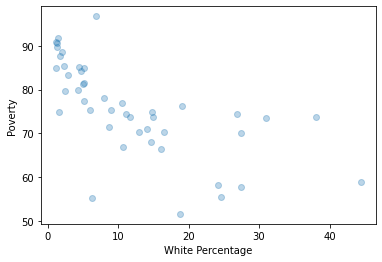

In [12]:
print("The correlation is {:.2f}".format(sdata["%_white"].corr(sdata["%_poverty"])))
plt.scatter(sdata["%_white"],sdata["%_poverty"],alpha = 0.3)
plt.xlabel("White Percentage")
plt.ylabel("Poverty")

The correlation is -0.53


Text(0, 0.5, 'Poverty')

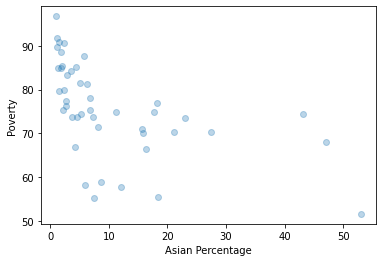

In [13]:
print("The correlation is {:.2f}".format(sdata["%_asian"].corr(sdata["%_poverty"])))
plt.scatter(sdata["%_asian"],sdata["%_poverty"],alpha = 0.3)
plt.xlabel("Asian Percentage")
plt.ylabel("Poverty")

The correlation is 0.38


Text(0, 0.5, 'Poverty')

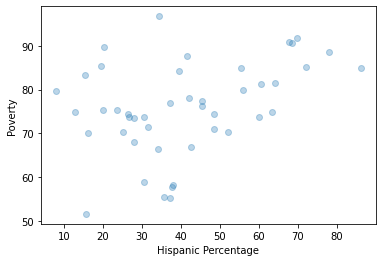

In [14]:
print("The correlation is {:.2f}".format(sdata["%_hispanic"].corr(sdata["%_poverty"])))
plt.scatter(sdata["%_hispanic"],sdata["%_poverty"],alpha = 0.3)
plt.xlabel("Hispanic Percentage")
plt.ylabel("Poverty")

The correlation is 0.31


Text(0, 0.5, 'Poverty')

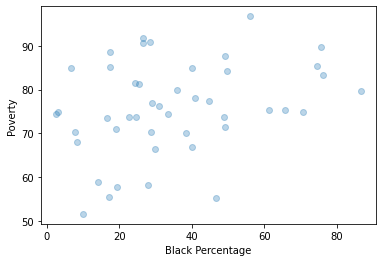

In [16]:
print("The correlation is {:.2f}".format(sdata["%_black"].corr(sdata["%_poverty"])))
plt.scatter(sdata["%_black"],sdata["%_poverty"],alpha = 0.3)
plt.xlabel("Black Percentage")
plt.ylabel("Poverty")